In [224]:
using Plots
using  LinearAlgebra

## 2

### i)

In [225]:
function Taylor0(x,a, derivadas, M)#x é o valor que será avaliado
    E = M*(x-a)
    f_a=derivadas[1]
    return f_a, E
end

Taylor0 (generic function with 1 method)

### ii)

In [226]:
function Taylor1(x,a, derivadas, M)#x é o valor que será avaliado
    E = (M*(x-a)^2)/2
    f_a=derivadas[1] + derivadas[2]*(x-a)
    return f_a, E
end

Taylor1 (generic function with 1 method)

### iii)

In [227]:
function Taylor2(x,a, derivadas, M)#x é o valor que será avaliado
    E = (M*(x-a)^3)/6
    f_a=derivadas[1] + derivadas[2]*(x-a) +(derivadas[3]*(x-a)^2)/2
    return f_a, E
end

Taylor2 (generic function with 1 method)

### iv)

In [228]:
function TaylorN(x,a, derivadas, M)#x é o valor que será avaliado
    n, = size(derivadas)
    #ordem n-1
    E = (M*(x-a)^n)/factorial(n)
    soma=0
    for i in 1:n
        soma+= (derivadas[i]*(x-a)^(i-1))/factorial(i-1)
    end
    return soma#, E
end

#e^x  x=0.1 a=0
derivadas =[1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1]
print(abs(TaylorN(0.1, 0, derivadas, 10)-exp(0.1)))


4.440892098500626e-16

## 3

### i)

In [229]:

function média(x,y)#retorna a mádia entre x e y
    return (x+y)/2
end

function tem_sinais_opostos(f,a,b) #função recebe f(a) e f(b) não nulos e retorna true se f(a) e f(b) possuem sinais opostos, e retorna false caso contrário
    return f(a)*f(b) < 0
end

function é_raiz(f,a)
    return f(a)==0
end



function bissecao(f, a, b, erro) 
   
        
    if é_raiz(f,a)
        return a
    end
    if é_raiz(f,b)
        return b
    end
    if !(tem_sinais_opostos(f,a,b))
        return "Não tem sinais opostos"
    end    
    iterações = floor(log2((b-a)/erro))+1
    for i=1:iterações
        m=média(a,b)
        if é_raiz(f,m)
            return m
        end
            
        if tem_sinais_opostos(f,a,m)
            b=m
        else
            a=m
        end
    end
        
    return média(a,b)
end

 

bissecao (generic function with 1 method)

### ii)

In [254]:

function newton(funcao, a, b, erro)#funcao que implementa o método de newton
    
    chute_inicial=ceil(bissecao(funcao, a, b, erro))
    
    t = derivar_centralizada1(chute_inicial, funcao, 0.01)
    
    a= funcao(chute_inicial)
    
    return chute_inicial - a/t(chute_inicial)
end

function g(x)
    return x^2 - 4
end

newton(g, -0, 4, 0.1)

2.0

## 4


### i)

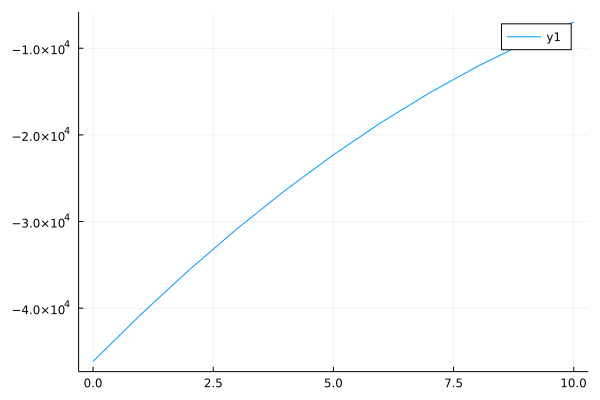

In [231]:
function interpolação(x,y)# função que calcula os coeficientes do polinomio interpolador, a partir da entrada de x e y
    n, = size(x)
    V=zeros(n, n)
    for i in 1:n
        for j in 1:n
            V[i,j]=x[i]^(j-1)
        end
    end
    c=inv(V)*y #resolver o sistema linear Vc=y
    #vetor de coeficientes
    function f(t)
        soma = 0
        for i in 1:n
            soma+=c[i]*t^(i-1)
        end
        return soma    
    end
    return f
end

x=[15.5; 16.5; 17.5]
y =[34; 200; 25]
f=interpolação(x,y)
t =range(0, stop=10)
plot(t,f)


### ii)

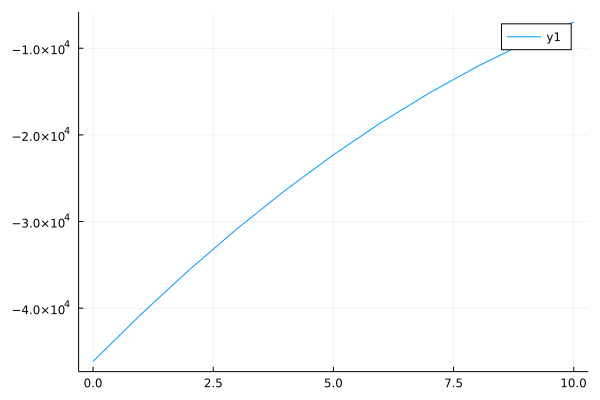

In [232]:
x=[15; 16.5; 17.5; 8]
y =[34; 30; 25; 16]
function interpola(x,y)# função que calcula os coeficientes do polinomio interpolador, a partir da entrada de x e y
    n, = size(x)
    L =zeros(n, 1)
    function f(t)
        expressao=0
        for i in 1:n
            numerador=1
            denominador=1
            for j in 1:n
                if(i!=j)
                    numerador*=(t-x[j])
                    denominador*=(x[i] - x[j])
                end  
            end
            L[i]=numerador/denominador
            expressao+=L[i]*y[i]
            
        end
        return expressao
    end
    
    return f
end


x=[15.5; 16.5; 17.5]
y =[34; 200; 25]
f=interpola(x,y)
t =range(0, stop=10)
plot(t,f)

### 8

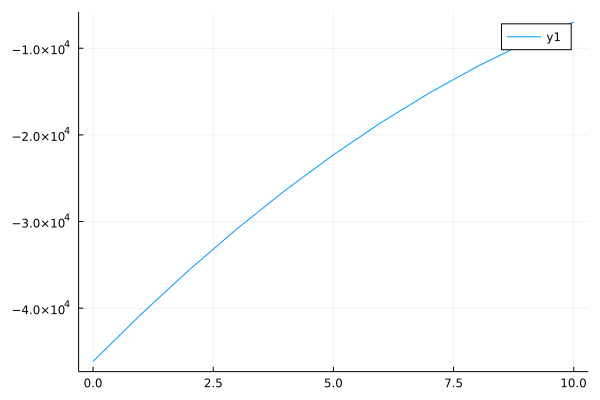

In [233]:
x=[15; 16.5; 17.5; 8]
y =[34; 30; 25; 16]
function interpola(x,y,z)# função que calcula os coeficientes do polinomio interpolador, a partir da entrada de x e y
    nx, = size(x)
    ny, = size(y)
    L =zeros(nx*ny, 1)
    function f(t, w)
        expressao=0
        for i in 1:n
            numerador=1
            denominador=1
            
            for j in 1:n
                if(i!=j)
                    numerador*=(t-x[j])
                    denominador*=(x[i] - x[j])
                end  
            end

            L[i]=numerador/denominador
            expressao+=L[i]*y[i]
            
        end
        return expressao
    end
    
    return f
end


x=[15.5; 16.5; 17.5]
y =[34; 200; 25]
f=interpola(x,y)
t =range(0, stop=10)
plot(t,f)

### 9


In [234]:
function norma(v)
    n, = size(v)
    soma =0
    for i in 1:n
        soma+=v[i]^2

    end    
    return sqrt(soma)
end

norma (generic function with 1 method)

## 10

In [235]:
function sistema_Aprox(A,b)
    A=A'*A
    b=A'*b
return inv(A)*b    
end

sistema_Aprox (generic function with 1 method)

## 17

## 18

In [237]:
function trapezio(f,n, a,b) #calcular a integral f(x) de a até b
    h=(b-a)/n
    S=0.0
    for i=1:(n-1)  #calcula o "meio"
        x=a+i*h
        S+=2*f(x)
    end
    S=h/2*(S+f(a)+f(b)) #calcula "as pontas"
    return S
end


trapezio (generic function with 2 methods)

## 19

In [238]:
function trapezio(f, tol, a,b, M) #calcular a integral f(x) de a até b
    n=ceil(sqrt((M*(b-a)^3)/(12*tol)))
    
    h=(b-a)/n
    S=0.0
    for i=1:(n-1)  #calcula o "meio"
        x=a+i*h
        S+=2*f(x)
    end
    S=h/2*(S+f(a)+f(b)) #calcula "as pontas"
    return S
end


trapezio (generic function with 2 methods)

## 21

### i)

In [239]:
function derivar_frente1(x, funcao, h)#funcao que calcula a derivada para frente
    function z(x)
        return (funcao(x+h)-funcao(x))/h

    end    
    return z
end    
    
function r(x)
    return x^3
end

d = derivar_frente(2, r, 0.00001)
d(7)


147.0002099949852

### ii)

In [240]:
function derivar_tras1(x, funcao, h)#funcao que calcula a derivada para trás    
    function z(x)
        return (funcao(x)-funcao(x-h))/h
    end    
    
    return z
end  

function r(x)
    return x^2
end

d = derivar_tras(2, r, 0.00001)
print(exp(7))
d(7)


1096.6331584284585

13.999989999291527

### iii)

In [241]:
function derivar_centralizada1(x, funcao, h)#funcao que calcula a derivada utilizando as duas funções derivadas, somando as duas e dividindo por dois, para garantir um resultado mais acertivo
    function z(x)
        return (funcao(x+h)-funcao(x-h))/(2*h)
    end
    return z
end

function r(x)
    return x^2
end

d = derivar_centralizada(2, r, 0.0000001)

d(7)

14.000000057023954

## 22

## i)

In [242]:
function derivar_frente2(f, x)#funcao que calcula a derivada para trás    
    n,= size(x)
    y=zeros(n-1,1)
    for i in 1:n-1
        y[i]=f[i+1]-f[i]
    end    
    return y
end  

f=[30000 32000 34000 36000 38000 40000 42000 44000 46000 48000 50000]
x=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
derivar_frente(f, x)

10×1 Matrix{Float64}:
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0

## ii)

In [243]:
function derivar_tras2(f, x)#funcao que calcula a derivada para trás    
    n,= size(x)
    y=zeros(n-1,1)
    for i in reverse(2:n)
        y[i-1]=f[i]-f[i-1]
    end    
    return y
end  

f=[30000 32000 34000 36000 38000 40000 42000 44000 46000 48000 50000]
x=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
derivar_tras(f, x)

10×1 Matrix{Float64}:
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0

### iii)

In [244]:
function derivar_centralizada2(f, x)#funcao que calcula a derivada utilizando as duas funções derivadas, somando as duas e dividindo por dois, para garantir um resultado mais acertivo
    n,= size(x)
    y=zeros(n-2,1)
    for i in 2:n-1
        y[i-1]=(f[i+1]-f[i-1])/2
    end    
    return y
end

f=[30000 32000 34000 36000 38000 40000 42000 44000 46000 48000 50000]
x=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
derivar_centralizada(f, x)

9×1 Matrix{Float64}:
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0